# В этом ноутбуке производилось исследование для модели mbart50, не вошедшее в работу

Качество подготовленных данных оказалось недостаточным, поэтому полученные материалы не были использованы в исследовании

In [5]:
import spacy
from spacy.tokens import DocBin
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
ru_stopwords = set(stopwords.words("russian"))
en_stopwords = set(stopwords.words("english"))

# ru_stopwords.add('это')
# ru_stopwords.add('всё')
# ru_stopwords.add('свой')
# ru_stopwords.add('ещё')
# ru_stopwords.add('весь')

# en_stopwords.add("'s")

from string import punctuation
punct_list = [c for c in punctuation]
punct_list.append('--')
punct_list.append('...')
punct_list.append('–')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\warri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
with open("corpora/subtitles/facebook/facebook5_spacy.bin", "rb") as file:
    en_translated_bytes_data = file.read()

nlp = spacy.blank("en")
doc_bin = DocBin().from_bytes(en_translated_bytes_data)
en_translated_docs = list(doc_bin.get_docs(nlp.vocab))

with open("corpora/subtitles/en_subtitles_spacy_dump.bin", "rb") as file:
    en_bytes_data = file.read()

nlp = spacy.blank("en")
doc_bin = DocBin().from_bytes(en_bytes_data)
en_docs = list(doc_bin.get_docs(nlp.vocab))

with open("corpora/subtitles/ru_subtitles_spacy_dump.bin", "rb") as file:
    ru_bytes_data = file.read()

nlp = spacy.blank("ru")
doc_bin = DocBin().from_bytes(ru_bytes_data)
ru_docs = list(doc_bin.get_docs(nlp.vocab))
ru_docs[5]

Да , думаю у Донни немножко есть . 

In [1]:
with open("corpora/subtitles/numerical_alignment/subtitles_inter.txt", "rt", encoding="utf-8") as file:
    aligned_inter = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

with open("corpora/subtitles/numerical_alignment/subtitles_itermax.txt", "rt", encoding="utf-8") as file:
    aligned_itermax = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

with open("corpora/subtitles/numerical_alignment/subtitles_mwmf.txt", "rt", encoding="utf-8") as file:
    aligned_mwmf = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

with open("corpora/subtitles/facebook/inter", "rt", encoding="utf-8") as file:
    t_aligned_inter = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

with open("corpora/subtitles/facebook/itermax", "rt", encoding="utf-8") as file:
    t_aligned_itermax = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

with open("corpora/subtitles/facebook/mwmf", "rt", encoding="utf-8") as file:
    t_aligned_mwmf = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

In [2]:
def plot_variety_pie(variety_dict, original_word: str):
    variety_dict_items = list(variety_dict.items())
    variety_dict_items.sort(key=lambda x: -len(x[1]))

    translations = []
    # translations.append("other")
    number_of_matches = []
    pre_number_of_matches = [len(x[1]) for x in variety_dict_items]
    total_words = sum(pre_number_of_matches)
    other_matches = 0
    for key, val in variety_dict_items:
        # if len(val) < (total_words / 100):
        #     other_matches += len(val)
        # else:
            translations.append(key)
            number_of_matches.append(len(val))
    # translations.append("_other")
    # number_of_matches.append(other_matches)
    
    # number_of_matches.append(other_len)

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d})".format(pct, absolute)

    # Creating plot
    fig = plt.figure(figsize =(10, 7))
    plt.pie(number_of_matches, autopct = lambda pct: func(pct, number_of_matches), labels = translations)

    plt.title(original_word)
    plt.legend(bbox_to_anchor=(0.85,1.025), loc="upper left")

    # show plot
    plt.show()

In [ ]:
print(en_stopwords)

[]


In [3]:
def get_variety_dict_from_alignment(original_word: str, aligned_text: list, t_aligned_text: list):
    variety_dict = defaultdict(lambda : set())
    translation_dict = defaultdict(lambda : set())
    hell = []
    for i, num_sentence_pairs in tqdm(enumerate(aligned_text)):
        # if len(num_sentence_pairs) == 0 or len(en_translated_docs[i]) == 0:
        #     continue
        
        phrase = []
        for src_idx, tgt_idx in num_sentence_pairs:
            # try:
                if ru_docs[i][src_idx].lemma_.lower() == original_word \
                    and en_docs[i][tgt_idx].text.lower() not in en_stopwords \
                        and en_docs[i][tgt_idx].text.lower() not in punct_list:
                    phrase.append(en_docs[i][tgt_idx].lemma_.lower())

            # except:
            #     print("Original:", i, src_idx, tgt_idx)
            #     continue

        if phrase:
            # phrase.sort()
            # phrase = ' '.join(phrase)
            # variety_dict[phrase].add(i)

            translated_phrase = []
            for tsrc_idx, ttgt_idx in t_aligned_text[i]:
                # try:
                    tlemma = en_translated_docs[i][ttgt_idx].lemma_.lower()
                    if ru_docs[i][tsrc_idx].lemma_.lower() == original_word \
                        and tlemma not in en_stopwords \
                            and tlemma not in punct_list:
                        # translation_dict[tlemma].append(i)
                        translated_phrase.append(tlemma)
                # except:
                #     print("Translation:", i, tsrc_idx, ttgt_idx)
                #     continue
            
            if translated_phrase:
                phrase.sort()
                phrase = ' '.join(phrase)
                variety_dict[phrase].add(i)
                translated_phrase.sort()
                translated_phrase = ' '.join(translated_phrase)
                translation_dict[translated_phrase].add(i)
            else:
                hell.append(i)

    return variety_dict, translation_dict, hell

900000it [00:04, 196421.33it/s]


same 61.92696192696193%


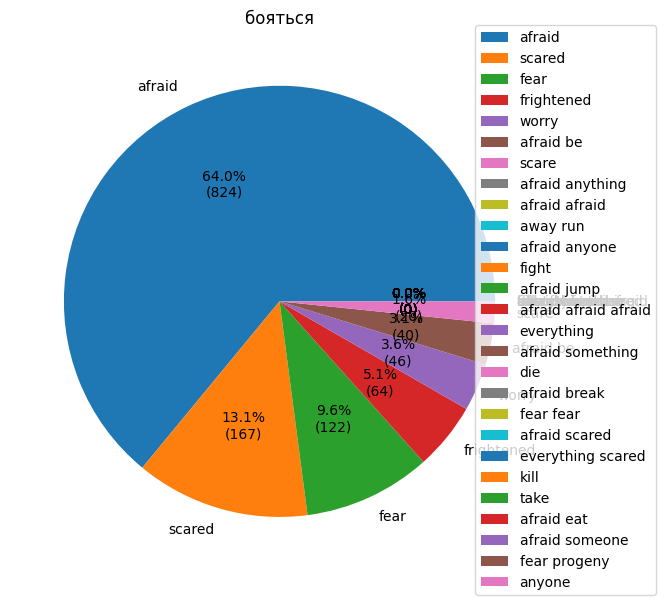

In [93]:
word = "бояться"
orig, trans, hell = get_variety_dict_from_alignment(word, aligned_inter, t_aligned_inter)
new_orig, new_trans = distil_dicts(orig, trans)
same_set, different_set = compare_dicts(new_orig, new_trans)
plot_variety_pie(new_orig, word)


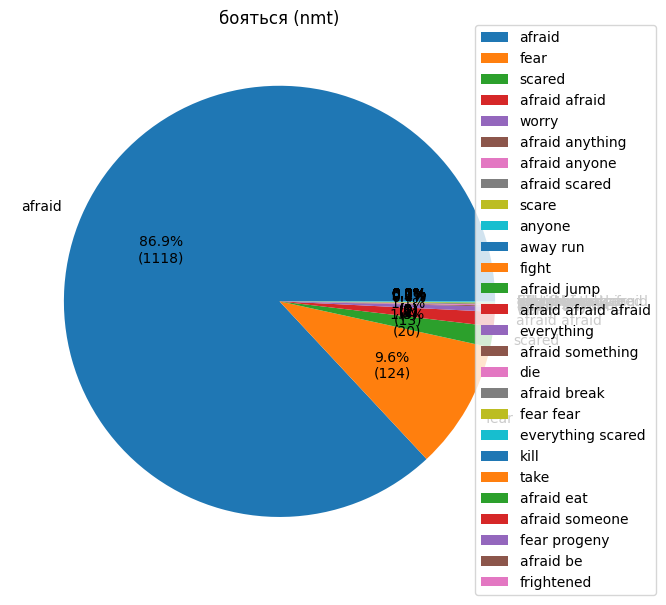

In [94]:
plot_variety_pie(new_trans, word + " (nmt)")

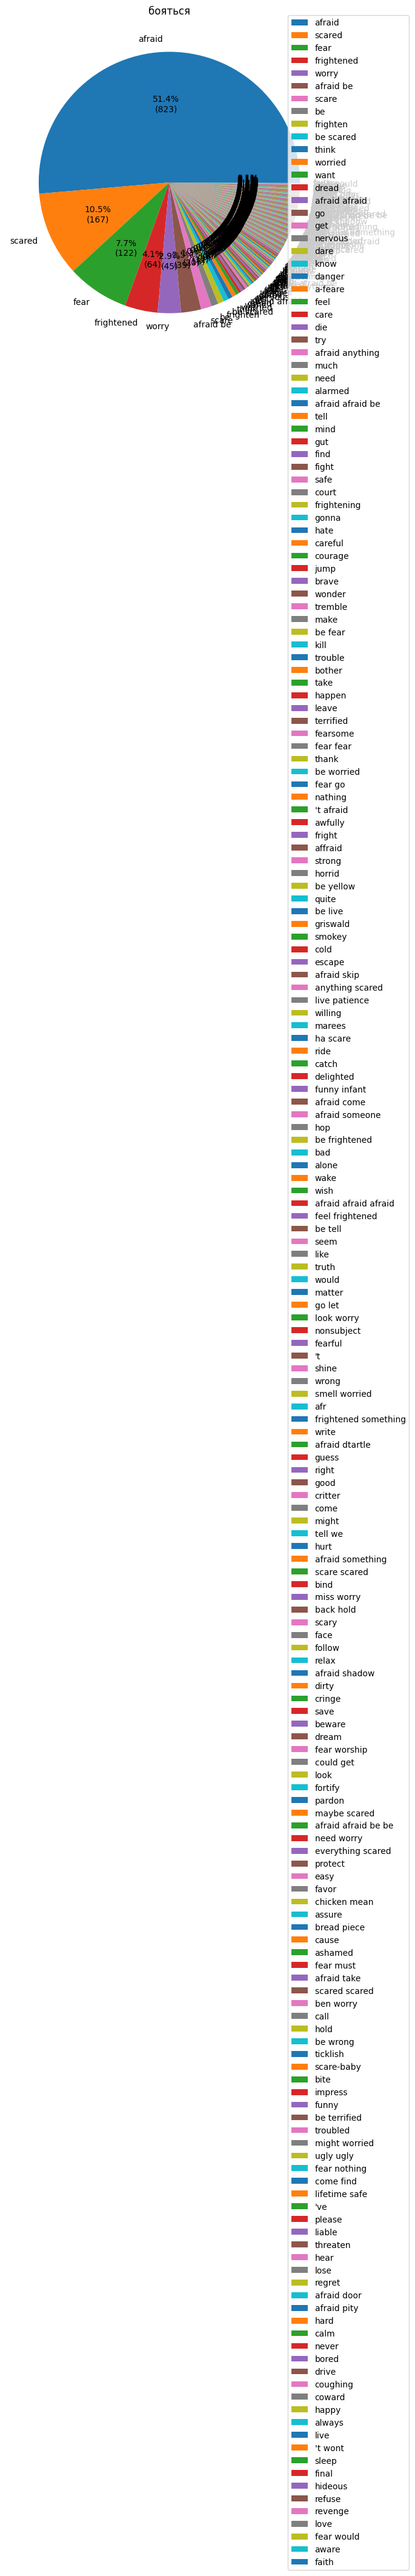

In [95]:
plot_variety_pie(orig, word) #+ " (nmt)") #

In [48]:
def compare_dicts(variety_dict: defaultdict, translated_dict: defaultdict):
    same_set = set()
    different_set = set()
    for key, value in variety_dict.items():
        same_set = same_set.union(translated_dict[key].intersection(value))
        different_set = different_set.union(translated_dict[key].symmetric_difference(value))
    for key, value in translated_dict.items():
        same_set = same_set.union(variety_dict[key].intersection(value))
        different_set = different_set.union(variety_dict[key].symmetric_difference(value))

    print(f"same {(len(same_set)/(len(same_set) + len(different_set)))*100}%")
    return same_set, different_set

In [9]:
same_set, different_set = compare_dicts(orig, trans)

NameError: name 'orig' is not defined

In [30]:
with open("subtitles_raw/en_raw_0-900.txt", "rt", encoding="utf-8") as f:
    en_corpus_raw = [line.strip() for line in f]

with open("subtitles_raw/ru_raw_0-900.txt", "rt", encoding="utf-8") as f:
    ru_corpus_raw = [line.strip() for line in f]

with open("corpora/subtitles/facebook/facebook5_whole.txt", "rt", encoding="utf-8") as f:
    translated_corpus_raw = [line.strip() for line in f]

In [17]:
with open("./tmpfile.txt", "wt", encoding="utf-8") as file:
    for i in data[1]['']:
        file.write(f"SENTENCE NUMBER: {i}\n\n")
        file.write(f"RU: {ru_corpus_raw[i]}\n\n")
        file.write(f"EN: {en_corpus_raw[i]}\n\n")
        file.write(f"TRANSLATED DOC: {en_translated_docs[i]}\n\n")
        file.write(f"TRANSLATED: {translated_corpus_raw[i]}\n\n")
        file.write("=========================\n\n")

NameError: name 'data' is not defined

In [11]:
def compare_dicts_one_word(variety_dict: defaultdict, translated_dict: defaultdict, word: str):
    same_set = set()
    different_set = set()
    for key, value in variety_dict.items():
        if key == word:
            same_set = same_set.union(translated_dict[key].intersection(value))
            different_set = different_set.union(translated_dict[key].symmetric_difference(value))
    for key, value in translated_dict.items():
        if key == word:
            same_set = same_set.union(variety_dict[key].intersection(value))
            different_set = different_set.union(variety_dict[key].symmetric_difference(value))

    print(f"same {(len(same_set)/(len(same_set) + len(different_set)))*100}%")
    return same_set, different_set

In [ ]:
s_set, d_set = compare_dicts_one_word(data[0], data[1], "baby")

In [ ]:
with open("./tmpfile.txt", "wt", encoding="utf-8") as file:
    for i in d_set:
        file.write(f"SENTENCE NUMBER: {i}\n\n")
        file.write(f"RU: {ru_corpus_raw[i]}\n\n")
        file.write(f"EN: {en_corpus_raw[i]}\n\n")
        file.write(f"TRANSLATED: {translated_corpus_raw[i]}\n\n")
        file.write("=========================\n\n")

Trying to calculate metrics

In [8]:
with open("subtitles_raw/en_raw_0-900.txt", "rt", encoding="utf-8") as f:
    en_corpus_raw = [line.strip() for line in f]

with open("subtitles_raw/ru_raw_0-900.txt", "rt", encoding="utf-8") as f:
    ru_corpus_raw = [line.strip() for line in f]

with open("corpora/subtitles/facebook/facebook5_whole.txt", "rt", encoding="utf-8") as f:
    translated_corpus_raw = [line.strip() for line in f]

In [ ]:
import nltk
from nltk.translate import meteor_score

predictions = ['a', 'a', 'a', 'b']
references = [['b', 'a', 'a', 'a']]
meteor_score.meteor_score(references, predictions)

0.9375

In [ ]:
# x = [val for val in orig.values()]
# all_human_sentences_for_word = []
# for w in x:
#     for el in w:
#         all_human_sentences_for_word.append(el)

x =  [val for val in trans.values()]
all_machine_sentences_for_word = []
for w in x:
    for el in w:
        all_machine_sentences_for_word.append(el)

In [ ]:
meteor_scores = []
for sentence_number in all_machine_sentences_for_word:
    predictions = [str(token) for token in en_translated_docs[sentence_number]]
    references = [[str(token) for token in en_docs[sentence_number]]]
    meteor_scores.append(meteor_score.meteor_score(references, predictions))

In [9]:
from evaluate import load
bertscore = load("bertscore")

In [37]:
with open("corpora/subtitles/facebook/facebook5_meteor.txt", "rt", encoding='utf-8') as f:
    meteor_data = [float(line.rstrip()) for line in f.readlines()]

In [ ]:
# meteor_orig = []
# for key, value in orig.items():
#     for idx in value:
#         meteor_orig.append(meteor_data[idx])

meteor_trans = []
for key, value in trans.items():
    for idx in value:
        meteor_trans.append(meteor_data[idx])

In [ ]:
get_meteor(new_trans)

In [14]:
word = "работа"
orig, trans, hell = get_variety_dict_from_alignment(word, aligned_inter, t_aligned_inter)

900000it [00:15, 59220.10it/s] 


In [60]:
def distil_dicts(orig, trans):
    sum_all = sum(map(lambda x: len(x), orig.values()))
    blacklist = []
    new_orig = defaultdict(set)
    for key, value in orig.items():
        if len(value) < sum_all / 100:
            blacklist += value
        else:
            new_orig[key] = set(value)

    new_trans = defaultdict(set)
    for key, value in trans.items():
        new = []
        for el in value:
            if el not in blacklist:
                new.append(el)
        new_trans[key] = set(new)
    
    return new_orig, new_trans

In [40]:
new_orig, new_trans = distil_dicts(orig, trans)

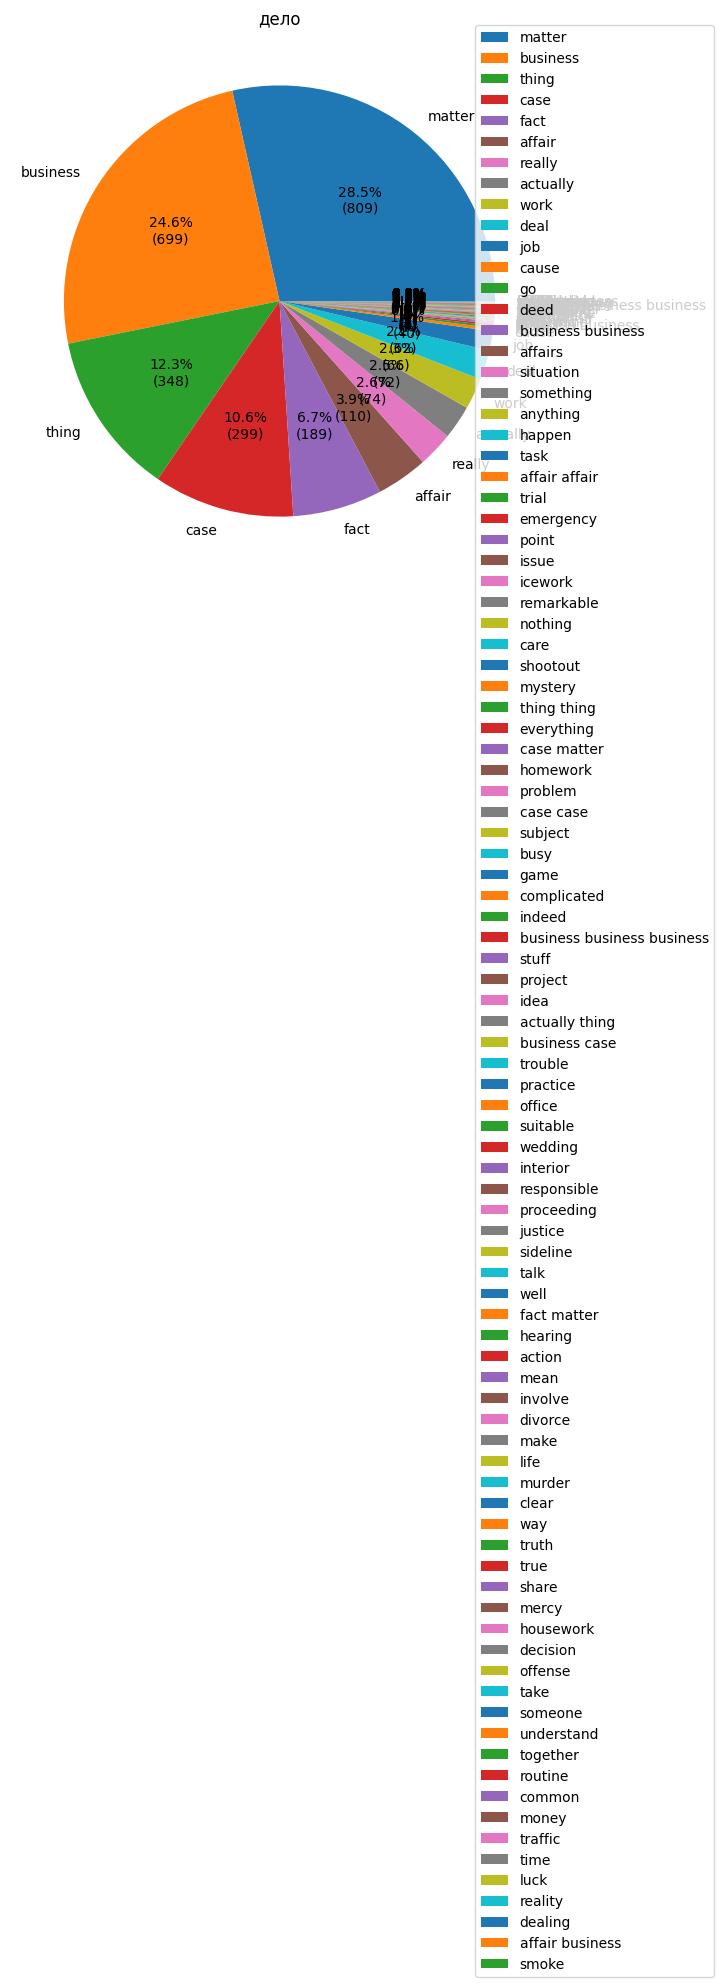

In [14]:
plot_variety_pie(new_trans, "дело")

In [16]:
def get_meteor(trans):
    meteor_trans = []
    for key, value in trans.items():
        for idx in value:
            meteor_trans.append(meteor_data[idx])
    return sum(meteor_trans) / len(meteor_trans)

In [17]:
def get_bertscore(trans):
    refs = []
    preds = []
    for val in trans.values():
        for i in val:
            refs.append(en_corpus_raw[i])
            preds.append(translated_corpus_raw[i])
    results = bertscore.compute(predictions=preds, references=refs, lang="en")
    return results

In [18]:
def metrix_conveyor(wordlist):
    bscores = []
    meteorscores = []
    for word in wordlist:
        orig, trans, hell = get_variety_dict_from_alignment(word, aligned_inter, t_aligned_inter)
        new_orig, new_trans = distil_dicts(orig, trans)
        meteorscores.append(get_meteor(new_trans))
        bscores.append(get_bertscore(new_trans))
    return bscores, meteorscores

In [20]:
a, b = metrix_conveyor(["друг"])

900000it [00:06, 143175.95it/s]


In [24]:
a[0]

{'precision': [0.8614529371261597,
  0.9433117508888245,
  0.982096791267395,
  0.9089571237564087,
  0.9602533578872681,
  0.9274013042449951,
  0.9677847623825073,
  0.9180759787559509,
  0.9635018110275269,
  0.9495264291763306,
  0.8859492540359497,
  0.9183845520019531,
  0.9686739444732666,
  0.9004629254341125,
  0.9571195244789124,
  0.9403442144393921,
  0.981360137462616,
  0.9146531820297241,
  0.8986872434616089,
  0.926077127456665,
  0.8958256840705872,
  0.976333498954773,
  0.9856024980545044,
  0.924193263053894,
  0.9372318983078003,
  0.9575063586235046,
  0.9236167073249817,
  0.924923300743103,
  0.9284775853157043,
  0.8983539342880249,
  0.9267025589942932,
  0.9398024082183838,
  0.8969883918762207,
  0.9322062134742737,
  0.8914790153503418,
  0.9647338390350342,
  0.9841232299804688,
  0.87153559923172,
  0.9410812258720398,
  0.8795455694198608,
  0.9426969289779663,
  0.965471088886261,
  0.92461758852005,
  0.8894237279891968,
  0.9150874018669128,
  0.9462

In [26]:
for i, score in enumerate(a):
    precisions = [prec for prec in score['precision']]
    print(f"друг: meteor {b[i]} | bertscore {sum(precisions) / len(precisions)}")

друг: meteor 0.6253622668085237 | bertscore 0.932813879797983


In [27]:
wordlist = ['друг', 'женщина', 'любить', 'найти', 'новый', 'старый', 'работа', 'ребенок', 'бояться', 'дело', 'милый', 'отличный']

In [31]:
bscores, meteorscores = metrix_conveyor(wordlist)

900000it [00:04, 195358.19it/s]
900000it [00:04, 180202.01it/s]
900000it [00:19, 46753.24it/s]
900000it [00:06, 135925.19it/s]
900000it [00:04, 182382.74it/s]
900000it [00:04, 190025.45it/s]
900000it [00:04, 213525.08it/s]
900000it [00:04, 222117.64it/s]
900000it [00:04, 207541.09it/s]
900000it [00:05, 166556.01it/s]
900000it [00:04, 203136.15it/s]
900000it [00:04, 217826.41it/s]


In [32]:
for i, score in enumerate(bscores):
    precisions = [prec for prec in score['precision']]
    print(f"{wordlist[i]}: meteor {meteorscores[i]} | bertscore {sum(precisions) / len(precisions)}")

друг: meteor 0.6253622668085237 | bertscore 0.9279423322900177
женщина: meteor 0.5790910955466693 | bertscore 0.9245213153462376
любить: meteor 0.6659467831645487 | bertscore 0.9414159940588698
найти: meteor 0.6198900082846895 | bertscore 0.9311286170775752
новый: meteor 0.609713651132387 | bertscore 0.9258274269843879
старый: meteor 0.5711402433920444 | bertscore 0.9199697617887352
работа: meteor 0.5475282178445616 | bertscore 0.9219285981782762
ребенок: meteor 0.125 | bertscore 0.9323632717132568
бояться: meteor 0.6311648480258008 | bertscore 0.9372573976564889
дело: meteor 0.5960570246249127 | bertscore 0.9175369945000594
милый: meteor 0.5558502011178983 | bertscore 0.9124941456162072
отличный: meteor 0.4273059445814609 | bertscore 0.9294199819028451


In [33]:
def meteor_conveyor(wordlist):
    meteorscores = []
    for word in wordlist:
        orig, trans, hell = get_variety_dict_from_alignment(word, aligned_inter, t_aligned_inter)
        new_orig, new_trans = distil_dicts(orig, trans)
        meteorscores.append(get_meteor(new_trans))
        # bscores.append(get_bertscore(new_trans))
    return meteorscores

In [38]:
meteors = meteor_conveyor(wordlist)

900000it [00:04, 195851.30it/s]
900000it [00:04, 219895.80it/s]
900000it [00:03, 226159.20it/s]
900000it [00:03, 227329.79it/s]
900000it [00:03, 235679.43it/s]
900000it [00:04, 224994.66it/s]
900000it [00:04, 220270.39it/s]
900000it [00:03, 229352.77it/s]
900000it [00:03, 233479.13it/s]
900000it [00:03, 230159.60it/s]
900000it [00:03, 234436.75it/s]
900000it [00:03, 231386.13it/s]


In [39]:
for i, word in enumerate(wordlist):
    print(f"{word}: {meteors[i]}")

друг: 0.5860831961100857
женщина: 0.538479205205881
любить: 0.6356052825518167
найти: 0.5731288684623635
новый: 0.5631366912400991
старый: 0.5212138851611877
работа: 0.5048569752442141
ребенок: 0.46875
бояться: 0.587717322007511
дело: 0.542805499303785
милый: 0.47557202835642176
отличный: 0.3503320776901293


In [ ]:
word = "любить"
orig, trans, hell = get_variety_dict_from_alignment(word, aligned_inter, t_aligned_inter)

In [15]:
bscore = get_bertscore(new_trans)
precisions = [prec for prec in bscore['precision']]
sum(precisions) / len(precisions)

NameError: name 'get_bertscore' is not defined

In [ ]:
x = get_meteor(new_trans)
x

In [44]:
word = "отличный"
orig, trans, hell = get_variety_dict_from_alignment(word, aligned_inter, t_aligned_inter)

900000it [00:32, 27659.64it/s]


In [31]:
new_orig, new_trans = distil_dicts(orig, trans)

In [32]:
indexes = []
for key, value in new_orig.items():
    indexes += value

In [33]:
ru_all_docs = ru_docs
en_all_docs = en_docs

In [34]:
def fill_bert_dict_for_one_word(indexes: list, original_word: str, aligned_text: list):
    MASK_TOKEN = '[MASK]'
    bert_word_dict = defaultdict(list)
    for line_idx in tqdm(indexes):
        ru_doc = ru_all_docs[line_idx]
        ru_token_idx = -1;
        for j, token in enumerate(ru_doc):
            if token.lemma_.lower() == original_word:
                if ru_token_idx != -1: 
                    ru_token_idx = -1
                    break
                else:
                    ru_token_idx = j
        if ru_token_idx != -1:
            en_token_idx = -1
            en_tokens = [token.text for token in en_all_docs[line_idx]]
            # print(line_idx)
            for src, tgt in aligned_text[line_idx]:
                if src == ru_token_idx:
                    if en_token_idx != -1:
                        en_token_idx = -1
                        break
                    else:
                        en_token_idx = tgt
            if en_token_idx != -1:
                en_tokens[en_token_idx] = MASK_TOKEN
                pred = model(' '.join(en_tokens))
                bert_word_dict[str(line_idx)] = pred
    return bert_word_dict

In [35]:
from transformers import pipeline
model = pipeline('fill-mask', model='bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [39]:
pred = model("From tomorrow it 's a new life for us , no more [MASK] and we 'll get a butler , too .")
pred

[{'score': 0.13921332359313965,
  'token': 1010,
  'token_str': ',',
  'sequence': "from tomorrow it's a new life for us, no more, and we'll get a butler, too."},
 {'score': 0.08485563099384308,
  'token': 1012,
  'token_str': '.',
  'sequence': "from tomorrow it's a new life for us, no more. and we'll get a butler, too."},
 {'score': 0.014979608356952667,
  'token': 4268,
  'token_str': 'kids',
  'sequence': "from tomorrow it's a new life for us, no more kids and we'll get a butler, too."},
 {'score': 0.014464916661381721,
  'token': 5841,
  'token_str': 'jobs',
  'sequence': "from tomorrow it's a new life for us, no more jobs and we'll get a butler, too."},
 {'score': 0.013663706369698048,
  'token': 8858,
  'token_str': 'servants',
  'sequence': "from tomorrow it's a new life for us, no more servants and we'll get a butler, too."}]

In [40]:
bert_word_dict = fill_bert_dict_for_one_word(indexes, "работа", aligned_inter)
bert_word_dict

100%|██████████| 2512/2512 [03:40<00:00, 11.39it/s]


defaultdict(list,
            {'270338': [{'score': 0.47163888812065125,
               'token': 2017,
               'token_str': 'you',
               'sequence': "now, if you'll excuse me, i'll get back to you."},
              {'score': 0.2931755781173706,
               'token': 2147,
               'token_str': 'work',
               'sequence': "now, if you'll excuse me, i'll get back to work."},
              {'score': 0.04117767885327339,
               'token': 2449,
               'token_str': 'business',
               'sequence': "now, if you'll excuse me, i'll get back to business."},
              {'score': 0.0184285007417202,
               'token': 2793,
               'token_str': 'bed',
               'sequence': "now, if you'll excuse me, i'll get back to bed."},
              {'score': 0.010551759041845798,
               'token': 2009,
               'token_str': 'it',
               'sequence': "now, if you'll excuse me, i'll get back to it."}],
             '466

In [41]:
variety_dict = defaultdict(list)
for key, value in bert_word_dict.items():
    variety_dict[value[0]["token_str"].lower()].append(key)

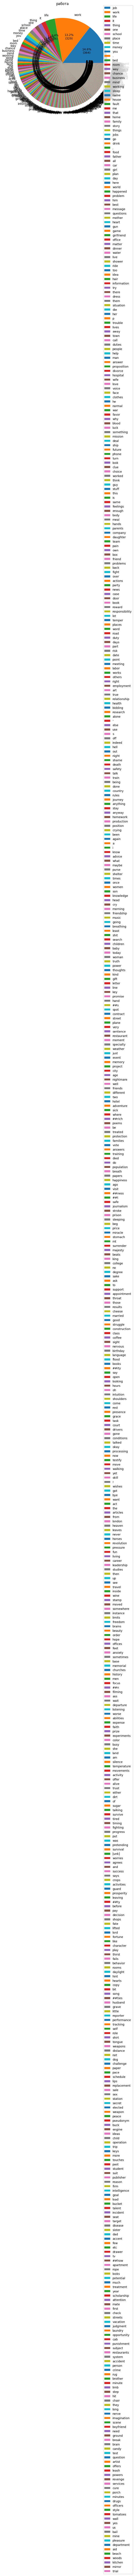

In [43]:
plot_variety_pie(variety_dict, "работа")